In [1]:
#import the important labraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Here load the dataset and read the dataset 
df = pd.read_csv('/content/dataset.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
#Here we checked the how rows and column in the dataset 
df.shape

(383, 17)

In [4]:
#here we check the what kind of data type in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
#Here we claculate the dataset as per the statistical format 
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [6]:
#Here we checjed the null values
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


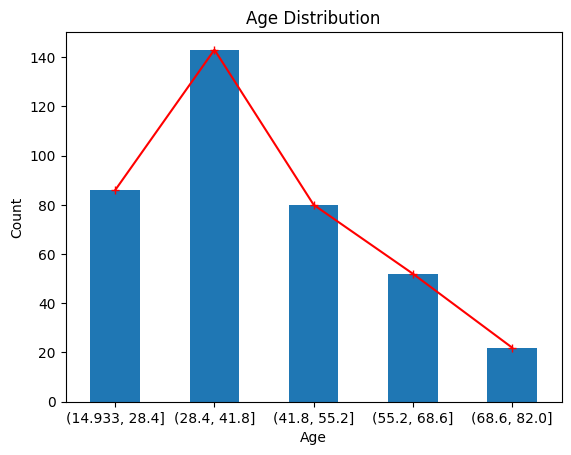

In [7]:
df.Age.groupby(pd.cut(df.Age,5)).count().plot(kind="bar")
df.Age.groupby(pd.cut(df.Age,5)).count().plot(kind="line", marker='+', color='Red')
plt.tick_params(labelrotation=0)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

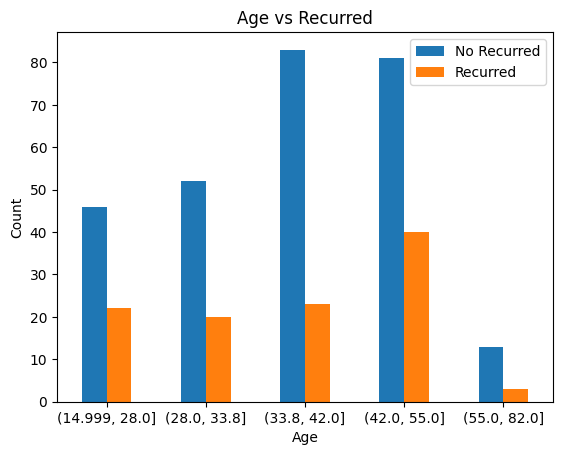

In [8]:
pd.crosstab(df.Age, df.Recurred).groupby(pd.qcut(df.Age,5)).sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.legend(['No Recurred', 'Recurred'])
plt.title("Age vs Recurred")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [9]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("dataset.csv")

# Copy to avoid modifying original
df_encoded = df.copy()

# Initialize encoder
le = LabelEncoder()

# 1. Binary Encoding (0/1)
binary_cols = ["Gender", "Smoking", "Hx Smoking", "Hx Radiothreapy", "Recurred", "M"]
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2. Nominal → One-Hot Encoding with dtype=int (fix True/False issue)
nominal_cols = ["Physical Examination", "Adenopathy", "Pathology", "Focality", "Response"]
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True, dtype=int)

# 3. Ordinal Encoding (Custom Mapping)
thyroid_order = {
    "Euthyroid": 0,
    "Subclinical Hypothyroidism": 1,
    "Subclinical Hyperthyroidism": 2,
    "Clinical Hypothyroidism": 3,
    "Clinical Hyperthyroidism": 4
}
risk_order = {"Low": 0, "Intermediate": 1, "High": 2}
stage_order = {"I": 0, "II": 1, "III": 2, "IVA": 3, "IVB": 4}
t_order = {"T1a": 0, "T1b": 1, "T2": 2, "T3a": 3, "T3b": 4, "T4a": 5, "T4b": 6}
n_order = {"N0": 0, "N1a": 1, "N1b": 2}

df_encoded["Thyroid Function"] = df_encoded["Thyroid Function"].map(thyroid_order)
df_encoded["Risk"] = df_encoded["Risk"].map(risk_order)
df_encoded["Stage"] = df_encoded["Stage"].map(stage_order)
df_encoded["T"] = df_encoded["T"].map(t_order)
df_encoded["N"] = df_encoded["N"].map(n_order)

# Save or preview
#print(df_encoded.head())
#df_encoded.to_csv("encoded_dataset.csv", index=False)
df_encoded.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Risk,T,N,M,...,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,34,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
2,30,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
3,62,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
4,62,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


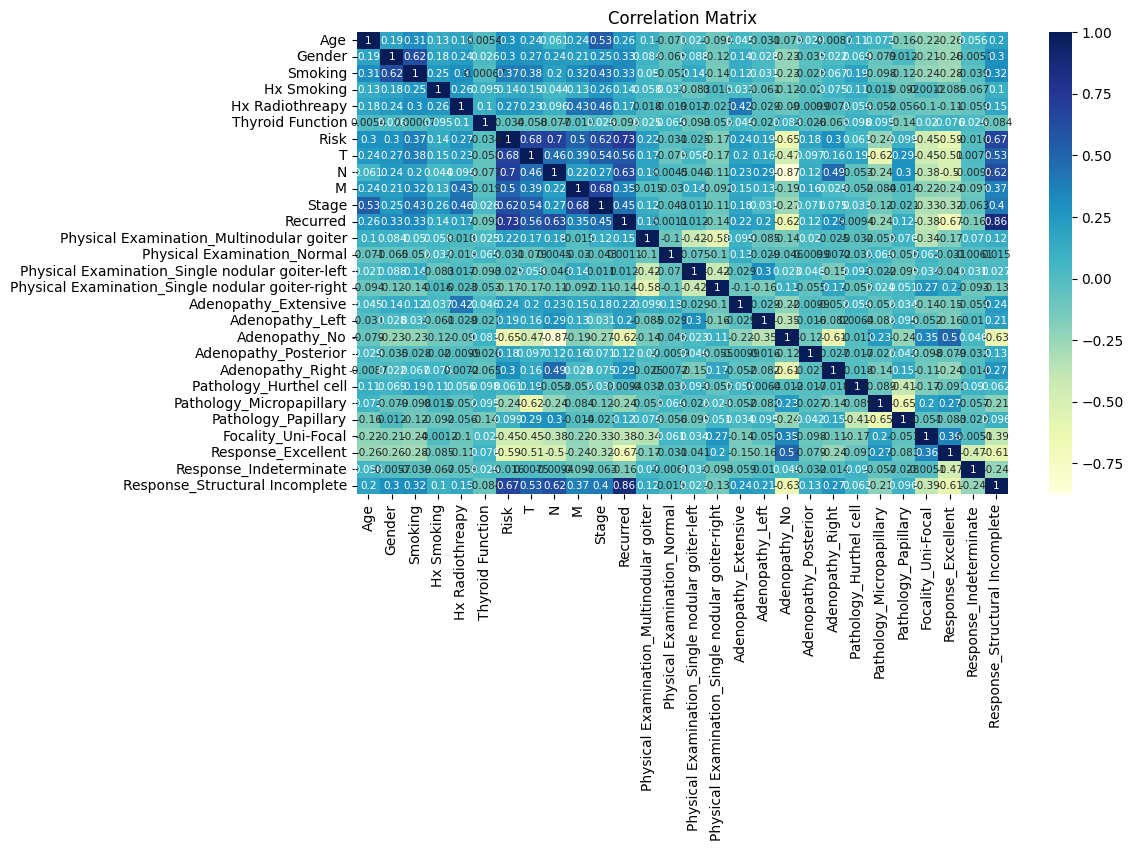

In [11]:
fig, ax = plt.subplots(figsize=(10.5,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 7.5})
plt.title("Correlation Matrix")
plt.show()

In [14]:
X = df_encoded.drop("Recurred", axis=1)
y= df_encoded['Recurred']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
len(X_train), len(X_test)

(306, 77)

In [18]:
# Importing these Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

model_dict = {"Logistic_Regression" : LogisticRegression(),
              "KNN_Classifier" : KNeighborsClassifier(),
              "Random_Forest" : RandomForestClassifier()}

def model_fit_and_score(model_dict, X, y, test_size=0.20):
    """
    Splitting X and Y Data in Train and Test Data,
    Then Fitting the train data to the model.
    And Checking the score for the Created Model.

    model_dict = Model Dictionery (Dictionery of Model we have selected)
    X = Feature Labels
    y = Target Data
    test_size = Test Split Size to split data in Test and Train sets
                Default = 0.20
    """

    model_score={} # Dictionary to append Scores of fitted model

    np.random.seed(41) # To get same values every time
    # Splitting Data in Train and Test Splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    for name, model in model_dict.items():
        # Fit Model
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    scores = pd.DataFrame(model_score, index=["Score"])
    scores.T.plot(kind="bar")
    plt.title("Scores of these Models")
    plt.xticks(rotation=0)
    plt.xlabel("Model Name")
    plt.ylabel("Score of Model")
    return scores

,Logistic_Regression,KNN_Classifier,Random_Forest
Score,0.87931,0.844828,0.896552


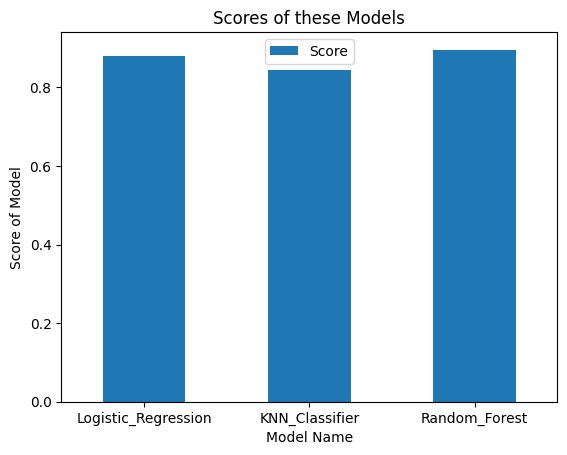

In [19]:
model_fit_and_score(model_dict, X, y, test_size=0.15)

In [21]:
def model_cross_val_score(model_dict, X, y, cv=5):
    """
    Cross Validation for Models in Model Dict...
    Providing Mean value of cross validation for each Parameter

    Parameter Includes : accuracy, precision, recall, f1_micro, f1_macro

    model_dict : Model Dictionery with/without parameter tuning
    X : Feature Data
    y : Target Data
    cv : Cross Validation folds (Default = 5)
    """
    warnings.filterwarnings("ignore")

    scoring_param = ["accuracy", "precision", "recall", "f1_micro", "f1_macro"]

    cv_score = {} # To append Scores of each Model


    np.random.seed(42)
    for name, model in model_dict.items():
        cv_score[name] = {}
        for param in scoring_param:
            # Calculating Mean values for cross validation with each Parameter
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score
    cv = pd.DataFrame(data=cv_score)
    return cv

In [22]:
model_cross_val_score(model_dict, X, y, cv=5)

,Logistic_Regression,KNN_Classifier,Random_Forest
accuracy,0.908237,0.905878,0.879357
precision,0.856371,0.888889,0.865000
recall,0.899567,0.807792,0.881385
f1_micro,0.908237,0.905878,0.910971
f1_macro,0.894835,0.881880,0.881424


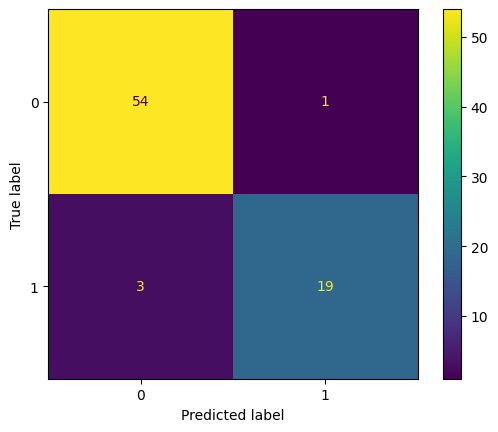

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = RandomForestClassifier()
# np.random.seed(42)
# Trying without fixing Random Seed for this one

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

con_mat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(con_mat)
ax = display.plot()
plt.show()

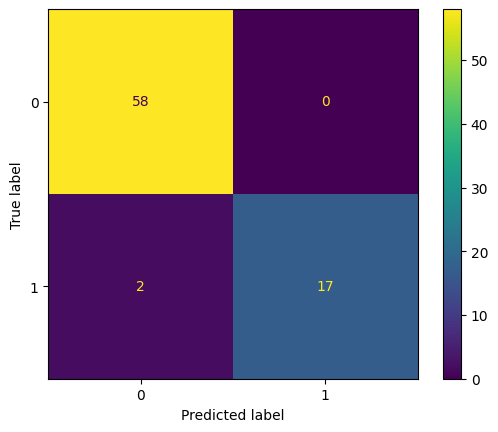

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = LogisticRegression()
# np.random.seed(42)
# Trying without fixing Random Seed for this one

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

con_mat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(con_mat)
ax = display.plot()
plt.show()

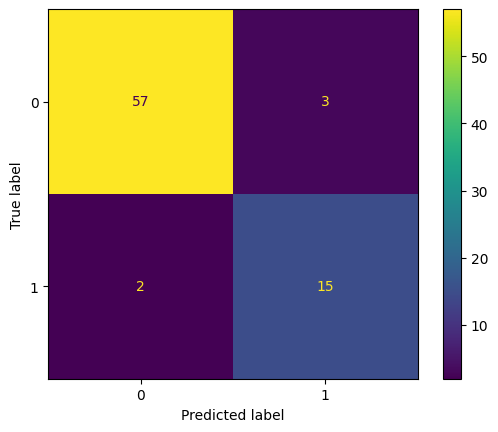

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = KNeighborsClassifier()
# np.random.seed(42)
# Trying without fixing Random Seed for this one

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

con_mat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(con_mat)
ax = display.plot()
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve


def plot_roc_curve(X, y, model):
    """
    Custom Function to get ROC curve plotted whenever we needed in this file (For Ease of use)

    """
    np.random.seed(41) # To get same values every time
    # Splitting Data in Train and Test Splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    model.fit(X_train, y_train)

    y_pred_prob = model.predict_proba(X_test)

    y_pred_positive = y_pred_prob[:,1]

    fpr, tpr, threshold = roc_curve(y_test, y_pred_positive)
    roc_score = roc_auc_score(y_test, y_pred_positive)

    fig, ax = plt.subplots(figsize=(5,5))

    fig.suptitle(f"AREA Under ROC Curve:{model}", fontsize=15, color="darkblue")

    ax.plot(fpr, tpr, color="darkgreen", label="ROC")

    ax.plot([0,1], [0,1], color="darkblue", linestyle="dotted", label="Base-line")

    ax.set(title="Receiver Operating Characteristics (ROC)")
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")

    ax.fill_between(fpr, tpr, 0, color="lightgrey")

    ax.text(0.55, 0.45, f"{roc_score*100:.2f}%", color="darkgreen")

    fig.legend(loc="right", )
    plt.show()


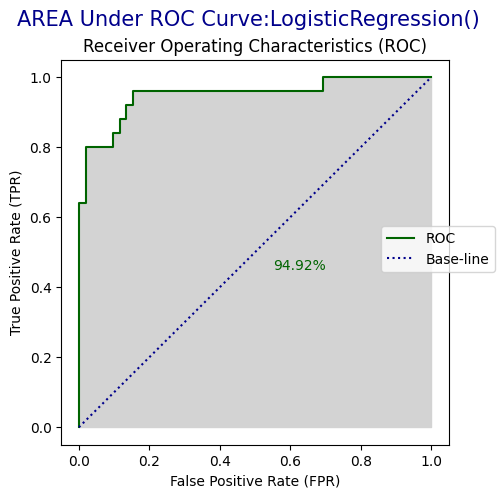

In [25]:
plot_roc_curve(X, y, LogisticRegression())

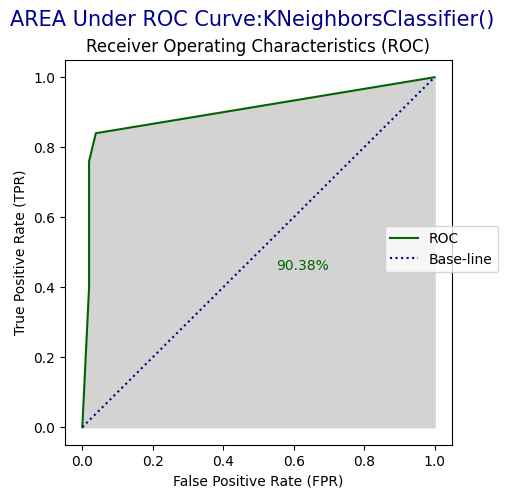

In [26]:
plot_roc_curve(X, y, KNeighborsClassifier())

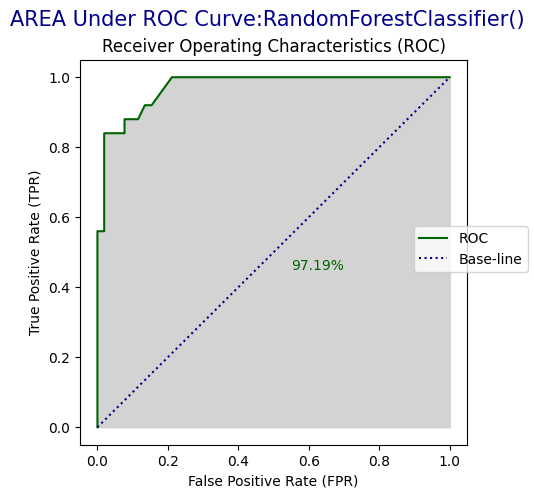

In [27]:
plot_roc_curve(X, y, RandomForestClassifier())

In [28]:
from sklearn.model_selection import GridSearchCV

# Setting Grid for Logistic Regression Parameters  for GridSearchCV
lr_grid = {"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
           "penalty" : ["none", "l1", "l2", "elasticnet"],
           "C" : np.logspace(-4, 4, 30)}

# Instantiate Grid Search CV
gs_log_reg_model = GridSearchCV(LogisticRegression(),
                                param_grid=lr_grid,
                                cv=5,
                                verbose=2)

# Fit Grid Search CV our Data
gs_log_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [29]:
gs_log_reg_model.best_score_, gs_log_reg_model.best_estimator_

(np.float64(0.9673717609730301),
 LogisticRegression(C=np.float64(0.7278953843983146), penalty='l1',
                    solver='liblinear'))

In [30]:
model_cross_val_score({"Grid_Search-Logistic Regression" : LogisticRegression(C=0.20433597178569418, solver='liblinear'),
                       "Logistic Regresion - Base Model" : LogisticRegression()},
                      X, y, cv=5)

,Grid_Search-Logistic Regression,Logistic Regresion - Base Model
accuracy,0.910902,0.908237
precision,0.862857,0.856371
recall,0.890476,0.899567
f1_micro,0.910902,0.908237
f1_macro,0.896322,0.894835


In [31]:
!pip install joblib

import joblib
#Setting Grid For KNN
knn_grid = {'n_neighbors': range(1,10, 1),
            'leaf_size': range(20,40,1),
            'p': (1,2),
            'weights': ('uniform', 'distance'),
            'metric': ('minkowski', 'chebyshev')}

# Instantiating GridSearch CV
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5,
                      verbose=3)

# Fitting Data in GridSearch CV Model
gs_knn.fit(X_train, y_train)

# Extract the best model from the GridSearchCV object
best_model = gs_knn.best_estimator_

# Save the best model using joblib
joblib.dump(best_model, 'model.joblib')

Streaming output truncated to the last 5000 lines.
[CV 1/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.952 total time=   0.0s
[CV 2/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.918 total time=   0.0s
[CV 3/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.934 total time=   0.0s
[CV 5/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 1/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.952 total time=   0.0s
[CV 2/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.934 total time=   0.0s
[CV 3/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END leaf_size=26, metric=

['model.joblib']

In [32]:
gs_knn.best_score_, gs_knn.best_params_

(np.float64(0.9509783183500794),
 {'leaf_size': 20,
  'metric': 'minkowski',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'distance'})

In [33]:
model_cross_val_score({"Grid_Search-KNN" : KNeighborsClassifier(leaf_size=20,
                                                                metric='chebyshev',
                                                                n_neighbors=7,
                                                                p=1,
                                                                weights='distance'),
                       "KNN - Base Model" : KNeighborsClassifier()},
                      X, y, cv=5)

,Grid_Search-KNN,KNN - Base Model
accuracy,0.848325,0.905878
precision,0.859615,0.888889
recall,0.621212,0.807792
f1_micro,0.848325,0.905878
f1_macro,0.801285,0.881880
